Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

C:\Users\91932\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Step 1: Load the dataset
dataset = 'uber.csv'
data = pd.read_csv(dataset)
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
data_sampled = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

In [4]:
# Step 2: Pre-process the dataset
# Convert pickup and drop-off datetime columns to datetime type
data_sampled['pickup_datetime'] = pd.to_datetime(data_sampled['pickup_datetime'])

In [5]:
# Extract features from datetime
data_sampled['hour'] = data_sampled['pickup_datetime'].dt.hour
data_sampled['day'] = data_sampled['pickup_datetime'].dt.day
data_sampled['month'] = data_sampled['pickup_datetime'].dt.month
data_sampled['year'] = data_sampled['pickup_datetime'].dt.year

In [6]:
# Handle missing values
data_sampled = data_sampled.dropna()

In [7]:
# Convert categorical data to numerical data (e.g., convert the 'pickup_location' and 'dropoff_location' to one-hot encoding)
data_sampled = pd.get_dummies(data_sampled, drop_first=True, sparse=True)

C:\Users\91932\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


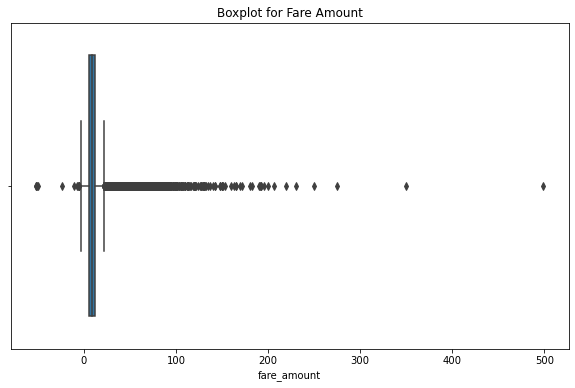

In [8]:
# Step 3: Identify outliers using boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data['fare_amount'])
plt.title('Boxplot for Fare Amount')
plt.show()

In [9]:
# Removing outliers using IQR
Q1 = data_sampled['fare_amount'].quantile(0.25)
Q3 = data_sampled['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
data_sampled = data_sampled[~((data_sampled['fare_amount'] < (Q1 - 1.5 * IQR)) | (data_sampled['fare_amount'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Step 4: Check correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data_sampled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 5: Split the dataset into features and target variable
X = data_sampled.drop(columns=['fare_amount', 'pickup_datetime'])
y = data_sampled['fare_amount']

In [ ]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 8: Implement Linear Regression, Ridge, and Lasso Regression Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [ ]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
# Step 9: Evaluate the Models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Performance:')
    print(f'R² Score: {r2:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print('-'*30)

In [ ]:
# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, 'Linear Regression')

In [ ]:
# Evaluate Ridge Regression
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')

In [ ]:
# Evaluate Lasso Regression
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')

In [ ]:
# Step 10: Compare the models
models_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_lasso))]
})

In [ ]:
print(models_comparison)